In [225]:
import pandas as pd

In [226]:
df = pd.read_csv("heart.csv")

In [227]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [228]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1007,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
472,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
177,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
762,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
182,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
811,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0
377,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1


In [229]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: >

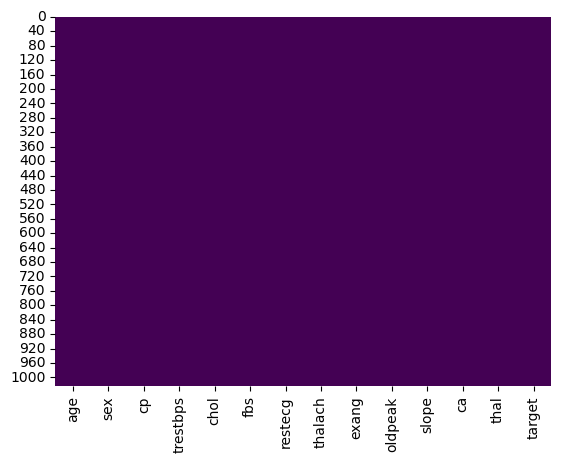

In [231]:
import seaborn as sns

sns.heatmap(df.isnull(), cmap="viridis", cbar=False) #Visão geral de nulos

<Axes: >

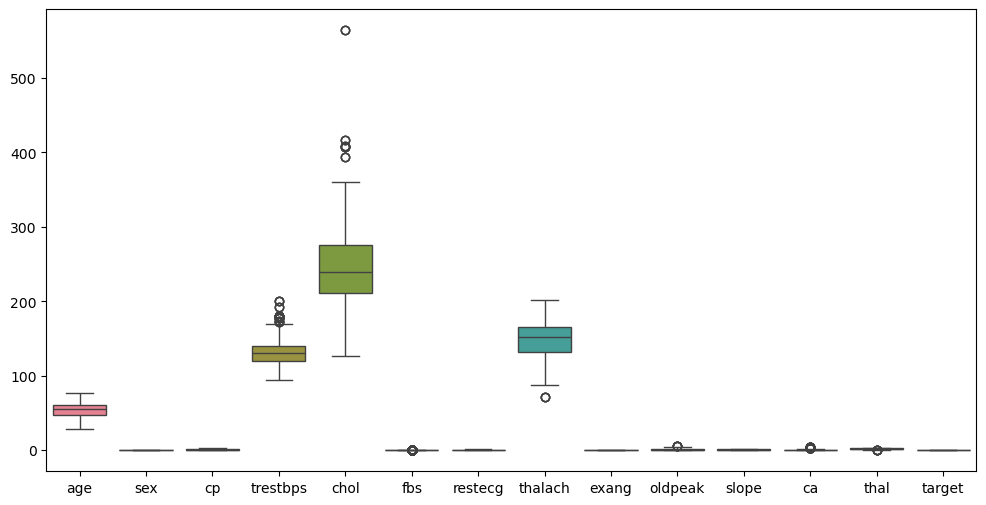

In [232]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(df)

In [233]:
def remover_outliers_iqr(df, coluna): #Utilizando o método  IQR para remover outliers
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    filtro = ~((df[coluna] < (Q1 - 1.5 * IQR)) | (df[coluna] > (Q3 + 1.5 * IQR)))
    return df[filtro]

df_limpo = remover_outliers_iqr(df, 'trestbps')
df_limpo = remover_outliers_iqr(df_limpo, 'chol')

print(f'Antes: {df.shape[0]}')
print(f'depois: {df_limpo.shape[0]}')


Antes: 1025
depois: 979


In [234]:
X = df_limpo.drop('target', axis=1)
y = df_limpo['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

               precision    recall  f1-score   support

Sem risco (0)       0.88      0.83      0.86       100
Com risco (1)       0.83      0.89      0.86        96

     accuracy                           0.86       196
    macro avg       0.86      0.86      0.86       196
 weighted avg       0.86      0.86      0.86       196

AUC-ROC: 0.9140625


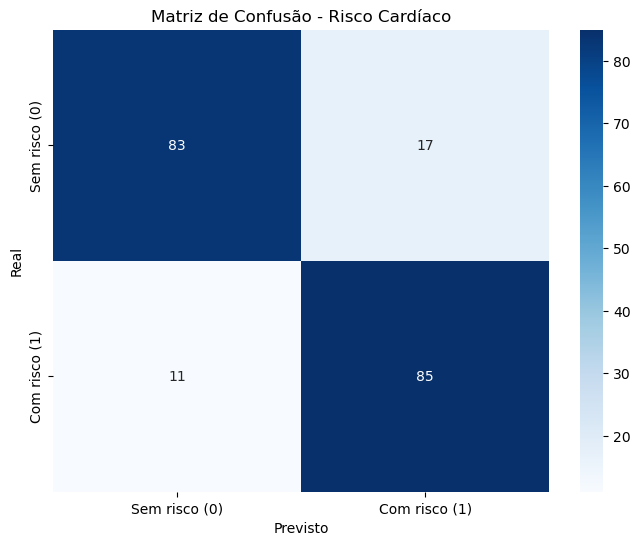

In [236]:
y_pred = modelo.predict(X_test)
y_probs = modelo.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred, target_names=['Sem risco (0)', 'Com risco (1)']))
print("AUC-ROC:", roc_auc_score(y_test, y_probs))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem risco (0)', 'Com risco (1)'],
            yticklabels=['Sem risco (0)', 'Com risco (1)'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Risco Cardíaco')
plt.show()